This notebook was constructed by combining from a Keras documentation example and a notebook written by IBM data scientist Jihyoung Kim.

In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import os
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Using TensorFlow backend.


In [2]:
batch_size = 128
num_classes = 10
epochs = 12
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_mnist_trained_simple_convolutional_model_12.h5'

In [3]:
# input image dimensions
img_rows, img_cols = 28, 28

In [4]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
'''
Paramters of "display_digits" function:

plt     - matplotlib's pyplot module.
images  - The array of images. Ex) X_train, X_test in our example
labels  - Labels of mapping images. 
start   - Start index of "images" array.
end     - End index of "images" array.
num_row - Number of rows.
title   - Title of every image that will be displayed. Ex) Training or Test
'''
def display_digits(plt, images, labels, start, end, num_row, title):
    images_and_labels = list(zip(images, labels))
    num_col = int(end/num_row) if (end % 2 == 0) else int(end/num_row) + 1

    for index, (image, label) in enumerate(images_and_labels[start:end]):
        plt.subplot(num_row, num_col, index + 1)
        plt.axis('off')
        plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title(title + ': %i' % label)

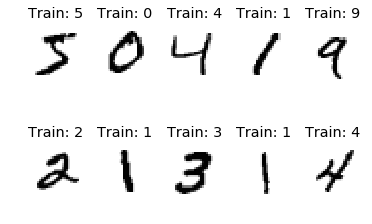

In [6]:
display_digits(plt, x_train, y_train, 0, 10, 2, 'Train')

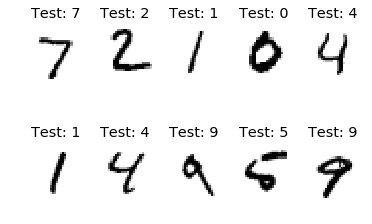

In [7]:
display_digits(plt, x_test, y_test, 0, 10, 2, 'Test')

In [8]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [9]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [10]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [11]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, kernel_size=(3, 3), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, 
                activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [12]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [13]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 460s 8ms/step - loss: 0.2748 - acc: 0.9148 - val_loss: 0.0572 - val_acc: 0.9827
Epoch 2/12
60000/60000 [==============================] - 484s 8ms/step - loss: 0.0924 - acc: 0.9736 - val_loss: 0.0415 - val_acc: 0.9858
Epoch 3/12
60000/60000 [==============================] - 484s 8ms/step - loss: 0.0676 - acc: 0.9802 - val_loss: 0.0386 - val_acc: 0.9862
Epoch 4/12
60000/60000 [==============================] - 472s 8ms/step - loss: 0.0562 - acc: 0.9828 - val_loss: 0.0336 - val_acc: 0.9881
Epoch 5/12
60000/60000 [==============================] - 484s 8ms/step - loss: 0.0471 - acc: 0.9856 - val_loss: 0.0358 - val_acc: 0.9889
Epoch 6/12
60000/60000 [==============================] - 478s 8ms/step - loss: 0.0427 - acc: 0.9873 - val_loss: 0.0316 - val_acc: 0.9898
Epoch 7/12
60000/60000 [==============================] - 465s 8ms/step - loss: 0.0397 - acc: 0.9879 - val_loss: 0.0289 - 

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [15]:
score_train = model.evaluate(x_train, y_train, verbose=0)
print('Train loss:', score_train[0])
print('Train accuracy:', score_train[1])

Train loss: 0.00852062478256
Train accuracy: 0.997566666667


In [16]:
score_test = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score_test[0])
print('Test accuracy:', score_test[1])

Test loss: 0.0284100452096
Test accuracy: 0.991


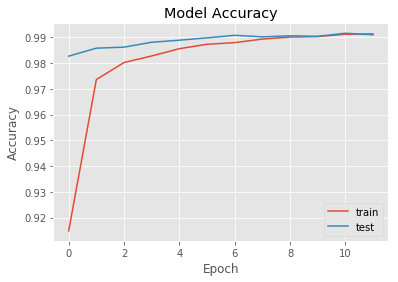

In [17]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='lower right')

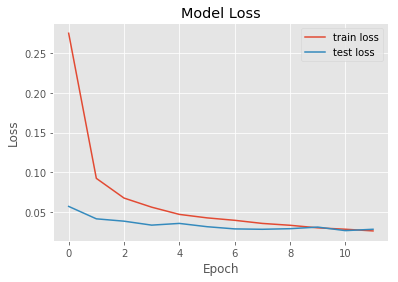

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train loss', 'test loss'], loc='upper right')

In [19]:
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /home/dsxuser/work/saved_models/keras_mnist_trained_simple_convolutional_model_12.h5 


In [20]:
# Load model and weights if necessary
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model = load_model(model_path)